In [2]:
import numpy as np
from glob import glob

# load filenames for human and dog images
human_files = np.array(glob("lfw/*/*"))
dog_files = np.array(glob("dog_images/*/*/*"))

# print number of images in each dataset
print('There are %d total human images.' % len(human_files))
print('There are %d total dog images.' % len(dog_files))

There are 13233 total human images.
There are 8351 total dog images.


In [3]:
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True

### TODO: Write data loaders for training, validation, and test sets
## Specify appropriate transforms, and batch_sizes

train_transforms = transforms.Compose([transforms.Resize(size=258),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.RandomRotation(10),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


# Pass transforms in here, then run the next cell to see how the transforms look
train_data = datasets.ImageFolder('dog_images/train', transform=train_transforms)
valid_data = datasets.ImageFolder('dog_images/valid', transform=valid_transforms)
test_data = datasets.ImageFolder('dog_images/test', transform=valid_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)

validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)

testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)

loaders_scratch = {'train' : trainloader, 'valid' : validloader, 'test' : testloader}


In [4]:
def find_classes(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_to_idx = {classes[i]: i for i in range(len(classes))}
    return classes, class_to_idx

def class_names(dir):
    classes = [d for d in os.listdir(dir) if os.path.isdir(os.path.join(dir, d))]
    classes.sort()
    class_names_dict = {i : classes[i] for i in range(len(classes))}
    return class_names_dict

class_names_dict = class_names('dog_images/train')
print(class_names_dict)

{0: '001.Affenpinscher', 1: '002.Afghan_hound', 2: '003.Airedale_terrier', 3: '004.Akita', 4: '005.Alaskan_malamute', 5: '006.American_eskimo_dog', 6: '007.American_foxhound', 7: '008.American_staffordshire_terrier', 8: '009.American_water_spaniel', 9: '010.Anatolian_shepherd_dog', 10: '011.Australian_cattle_dog', 11: '012.Australian_shepherd', 12: '013.Australian_terrier', 13: '014.Basenji', 14: '015.Basset_hound', 15: '016.Beagle', 16: '017.Bearded_collie', 17: '018.Beauceron', 18: '019.Bedlington_terrier', 19: '020.Belgian_malinois', 20: '021.Belgian_sheepdog', 21: '022.Belgian_tervuren', 22: '023.Bernese_mountain_dog', 23: '024.Bichon_frise', 24: '025.Black_and_tan_coonhound', 25: '026.Black_russian_terrier', 26: '027.Bloodhound', 27: '028.Bluetick_coonhound', 28: '029.Border_collie', 29: '030.Border_terrier', 30: '031.Borzoi', 31: '032.Boston_terrier', 32: '033.Bouvier_des_flandres', 33: '034.Boxer', 34: '035.Boykin_spaniel', 35: '036.Briard', 36: '037.Brittany', 37: '038.Brussels

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


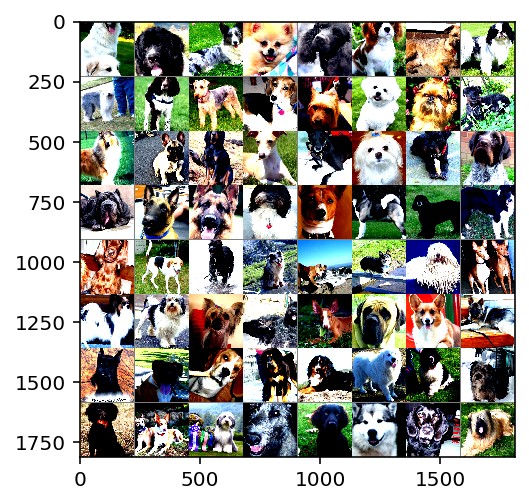

079.Great_pyrenees 106.Newfoundland 045.Cardigan_welsh_corgi 123.Pomeranian 009.American_water_spaniel 046.Cavalier_king_charles_spaniel 030.Border_terrier 091.Japanese_chin 113.Old_english_sheepdog 063.English_springer_spaniel
torch.Size([3, 224, 224])


In [5]:
import matplotlib.pyplot as plt
import numpy as np
import torchvision

def imshow(img):
    img = img / 2 + 0.5    
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

dataiter = iter(trainloader)
images, labels = dataiter.next()

imshow(torchvision.utils.make_grid(images))

print(' '.join('%5s' % class_names_dict[int(labels[j])] for j in range(10)))
print(images[0].size())

### (IMPLEMENTATION) Model Architecture

Create a CNN to classify dog breed.  Use the template in the code cell below.

In [6]:
import torch.nn as nn
import torch.nn.functional as F


# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.batchn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.batchn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.batchn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.batchn4 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 14 * 14, 1024)
        self.fc2 = nn.Linear(1024, 133)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.3)
        

    def forward(self, x):
        x = self.pool(F.relu(self.batchn1(self.conv1(x))))
        x = self.pool(F.relu(self.batchn2(self.conv2(x))))
        x = self.pool(F.relu(self.batchn3(self.conv3(x))))
        x = self.pool(F.relu(self.batchn4(self.conv4(x))))
        #print(x.size())
        x = x.view(-1, 128 * 14 * 14)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print (model_scratch)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=25088, out_features=1024, bias=True)
  (fc2): Linear(in_features=1024, out_features=133, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3)
)


__Question 4:__ Outline the steps you took to get to your final CNN architecture and your reasoning at each step.  

__Answer:__ 

### (IMPLEMENTATION) Specify Loss Function and Optimizer

Use the next code cell to specify a [loss function](http://pytorch.org/docs/stable/nn.html#loss-functions) and [optimizer](http://pytorch.org/docs/stable/optim.html).  Save the chosen loss function as `criterion_scratch`, and the optimizer as `optimizer_scratch` below.

In [7]:
import torch.optim as optim

### TODO: select loss function
criterion_scratch = nn.CrossEntropyLoss()

### TODO: select optimizer

optimizer_scratch = optim.Adam(model_scratch.parameters(), lr=0.001)



### (IMPLEMENTATION) Train and Validate the Model

Train and validate your model in the code cell below.  [Save the final model parameters](http://pytorch.org/docs/master/notes/serialization.html) at filepath `'model_scratch.pt'`.

In [8]:
import numpy as np
import time



def train(n_epochs, loaders, model, optimizer, criterion, use_cuda, save_path, verbose=False):
    """returns trained model"""
    # initialize tracker for minimum validation loss
    
    valid_loss_min = np.Inf 
    initial_time = time.time()
    train_losses, valid_losses = [], []
    
    for epoch in range(1, n_epochs+1):

        # initialize variables to monitor training and validation loss
        train_loss = 0.0
        valid_loss = 0.0
        initial_epoch_time = time.time()
        ###################
        # train the model #
        ###################
        model.train()
        for batch_idx, (data, target) in enumerate(loaders['train']):
            # move to GPU
            if use_cuda:
                data, target = data.cuda(), target.cuda()
            ## find the loss and update the model parameters accordingly
            ## record the average training loss, using something like
            ## train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
            optimizer.zero_grad()
            log_ps = model(data)
            loss = criterion(log_ps, target)
            loss.backward()
            optimizer.step()
        
            #running_loss += train_loss.item()
            train_loss = train_loss + ((1 / (batch_idx + 1)) * (loss.data - train_loss))
            
        ######################    
        # validate the model #A
        ######################
        model.eval()
        with torch.no_grad():
            for batch_idx, (data, target) in enumerate(loaders['valid']):
                # move to GPU
                if use_cuda:
                    data, target = data.cuda(), target.cuda()
                ## update the average validation loss

                ps_log = model(data)
                loss = criterion(ps_log, target)
                valid_loss = valid_loss + (1 / (batch_idx + 1)) * (loss.data - valid_loss)


                
            if verbose:
                final_epoch_time = time.time()
                print('Epoch: {} \tTraining Loss: {:.6f} \tValidation Loss: {:.6f} \tTime spent: {:.6f}'.format(
                   epoch, 
                   train_loss,
                   valid_loss,
                   final_epoch_time - initial_epoch_time
                   ))            
        
        train_losses.append(train_loss)
        valid_losses.append(valid_loss)
        
        ## TODO: save the model if validation loss has decreased
        if valid_loss <= valid_loss_min:
           #print('Validation loss decreased ({:.6f} --> {:.6f}).  Saving model ...'.format(valid_loss_min,valid_loss))
           torch.save(model.state_dict(), save_path)
           valid_loss_min = valid_loss    
    # return trained model
    
    final_time = time.time()
    return model, train_losses, valid_losses, final_time - initial_time


# train the model
#model_scratch = train(25, loaders_scratch, model_scratch, optimizer_scratch, criterion_scratch, use_cuda, 'model_scratch.pt')

# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

rebooting
rebooted
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.001
    weight_decay: 0
)
time spent:  0:21:40.935023
Minimum trainig loss:  2.134119749069214
Minimum validation loss:  3.727565050125122


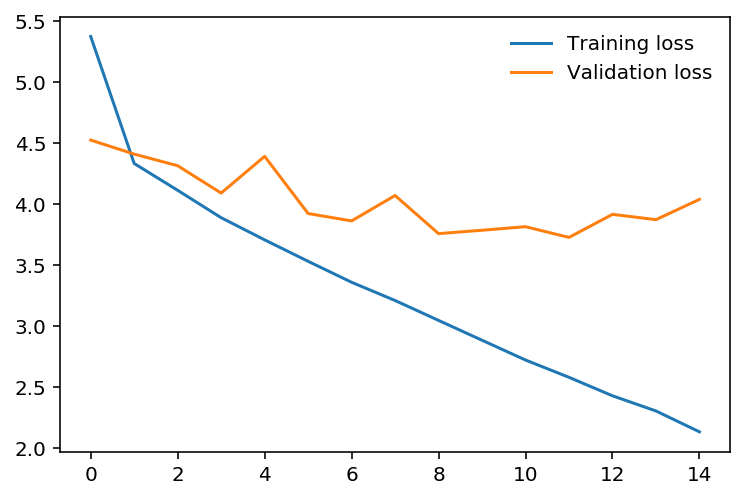

rebooting
rebooted
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0015
    weight_decay: 0
)
time spent:  0:20:39.641425
Minimum trainig loss:  2.8682703971862793
Minimum validation loss:  3.6266860961914062


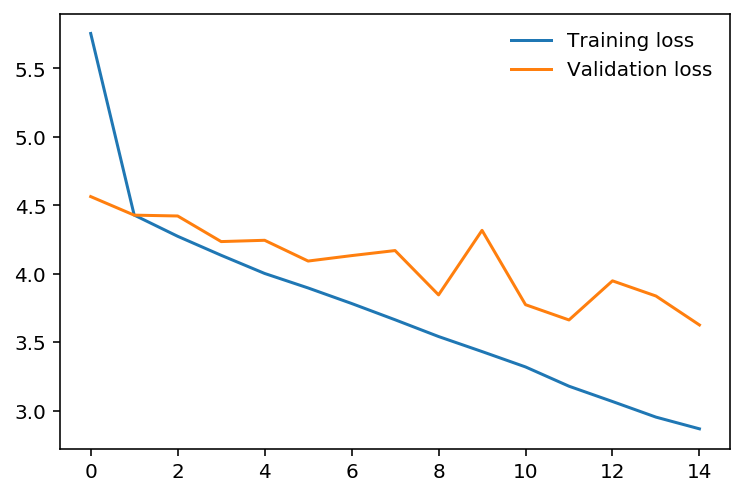

rebooting
rebooted
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.002
    weight_decay: 0
)
time spent:  0:21:31.382948
Minimum trainig loss:  3.459355115890503
Minimum validation loss:  3.8498175144195557


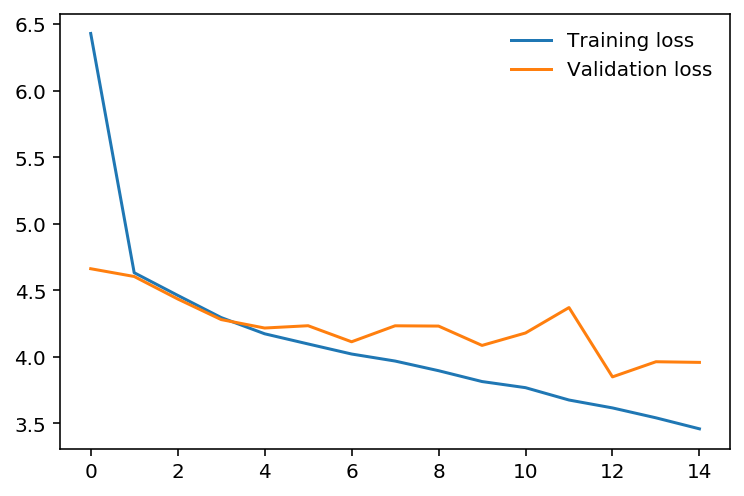

rebooting
rebooted
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0025
    weight_decay: 0
)
time spent:  0:20:23.866383
Minimum trainig loss:  4.572612285614014
Minimum validation loss:  4.619274616241455


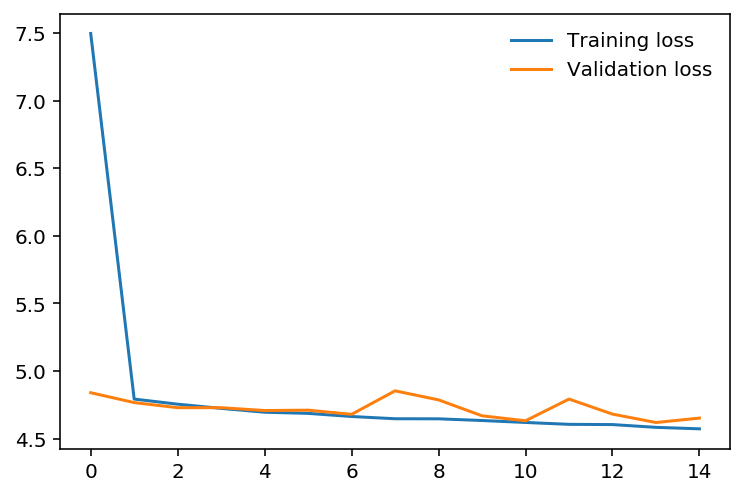

rebooting
rebooted
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.003
    weight_decay: 0
)
time spent:  0:21:15.494568
Minimum trainig loss:  4.863326072692871
Minimum validation loss:  4.857961177825928


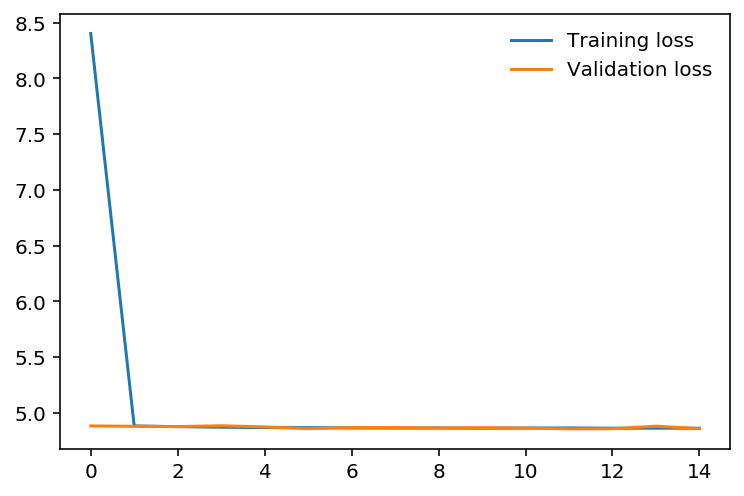

rebooting
rebooted
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0035
    weight_decay: 0
)
time spent:  0:20:24.993850
Minimum trainig loss:  4.8629655838012695
Minimum validation loss:  4.8551201820373535


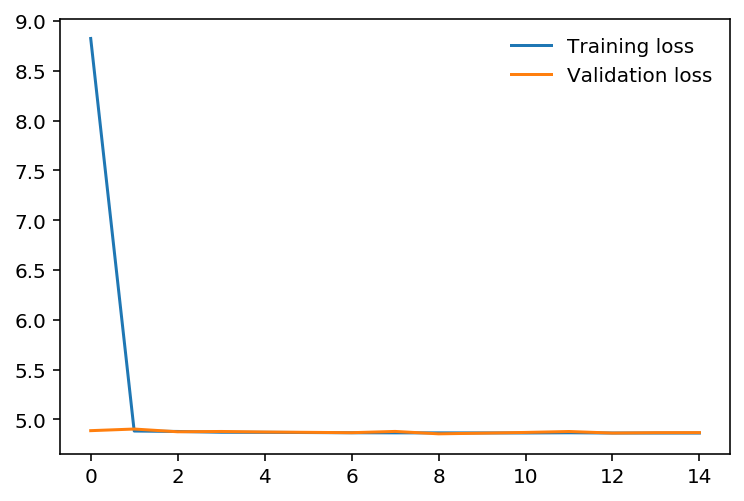

rebooting
rebooted
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.001
    momentum: 0
    nesterov: False
    weight_decay: 0
)
time spent:  0:19:44.145829
Minimum trainig loss:  4.398440837860107
Minimum validation loss:  4.48864221572876


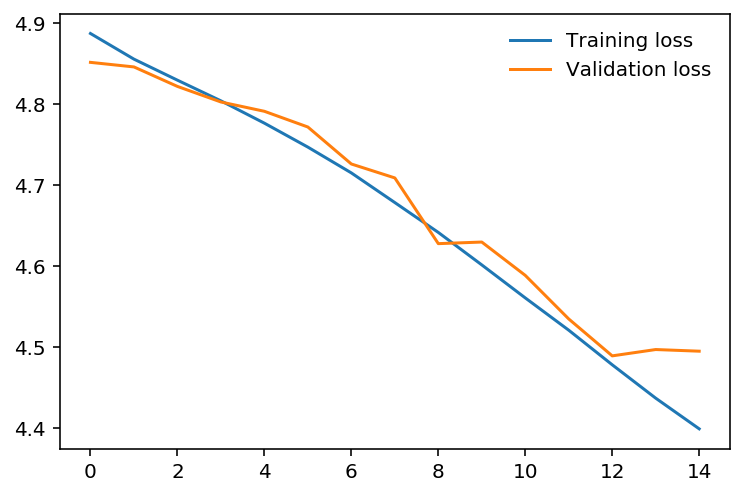

rebooting
rebooted
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0015
    momentum: 0
    nesterov: False
    weight_decay: 0
)
time spent:  0:19:42.318929
Minimum trainig loss:  4.147213935852051
Minimum validation loss:  4.34549617767334


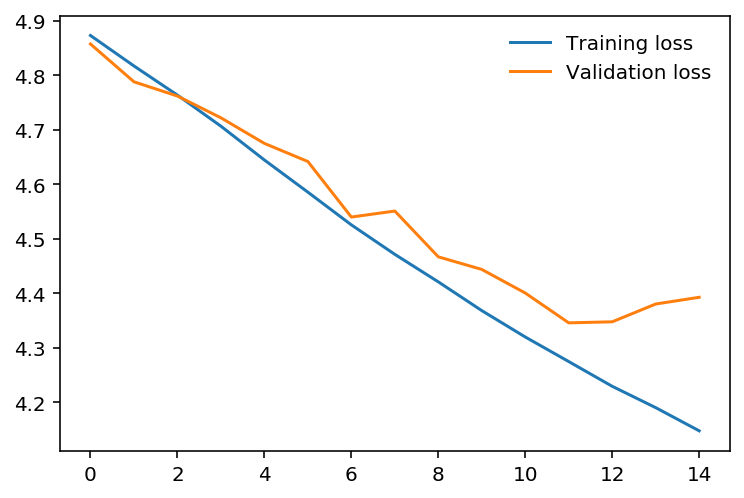

rebooting
rebooted
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.002
    momentum: 0
    nesterov: False
    weight_decay: 0
)
time spent:  0:19:50.867639
Minimum trainig loss:  4.0204267501831055
Minimum validation loss:  4.219099044799805


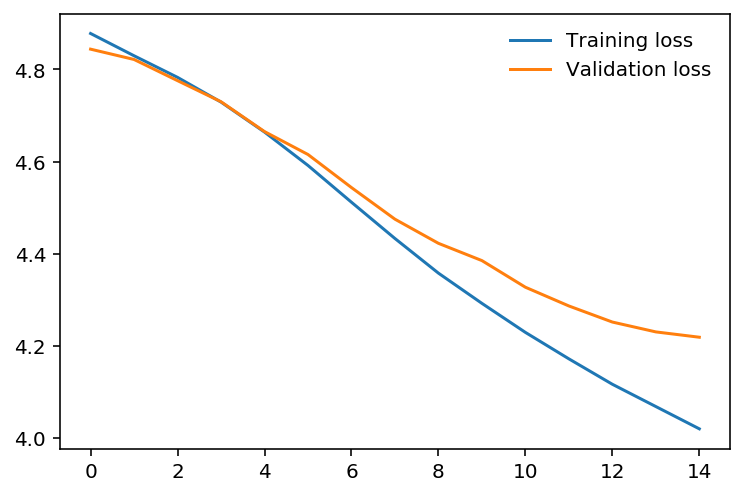

rebooting
rebooted
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0025
    momentum: 0
    nesterov: False
    weight_decay: 0
)
time spent:  0:20:30.156629
Minimum trainig loss:  3.8389623165130615
Minimum validation loss:  4.122251033782959


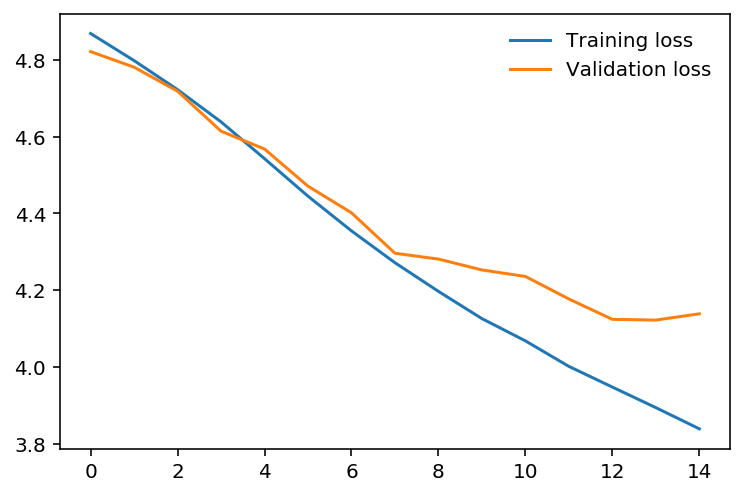

rebooting
rebooted
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.003
    momentum: 0
    nesterov: False
    weight_decay: 0
)
time spent:  0:19:41.593202
Minimum trainig loss:  3.7528746128082275
Minimum validation loss:  4.046343803405762


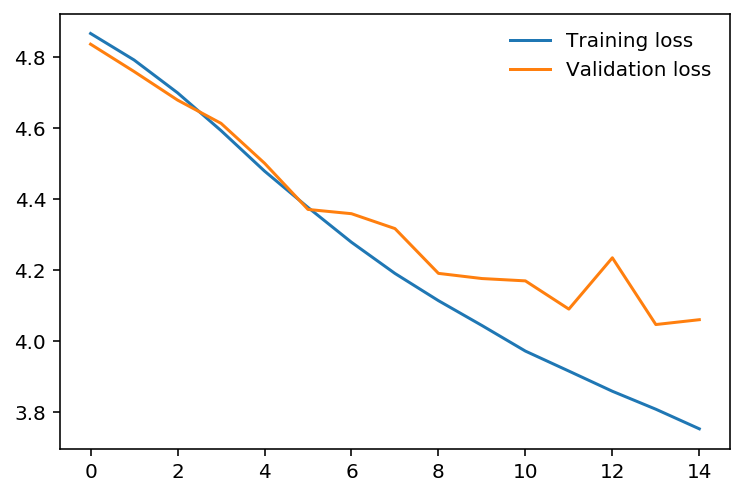

rebooting
rebooted
SGD (
Parameter Group 0
    dampening: 0
    lr: 0.0035
    momentum: 0
    nesterov: False
    weight_decay: 0
)
time spent:  0:19:52.467310
Minimum trainig loss:  3.669445514678955
Minimum validation loss:  3.9686543941497803


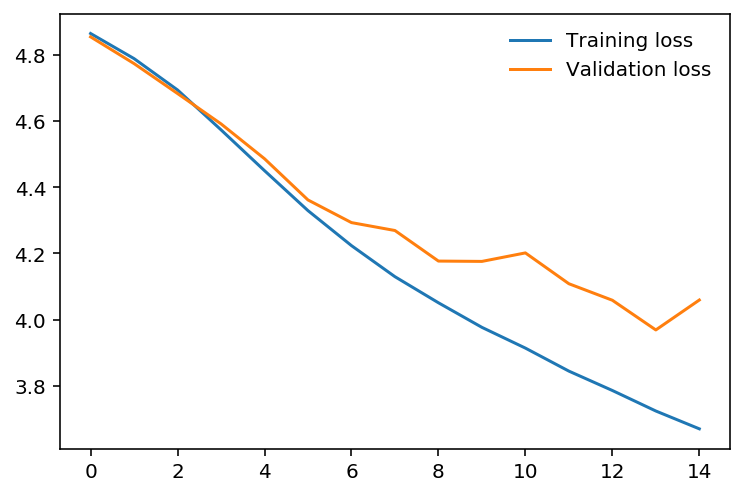

rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.001
    lr_decay: 0
    weight_decay: 0
)
time spent:  0:19:44.223436
Minimum trainig loss:  3.053046941757202
Minimum validation loss:  3.881134033203125


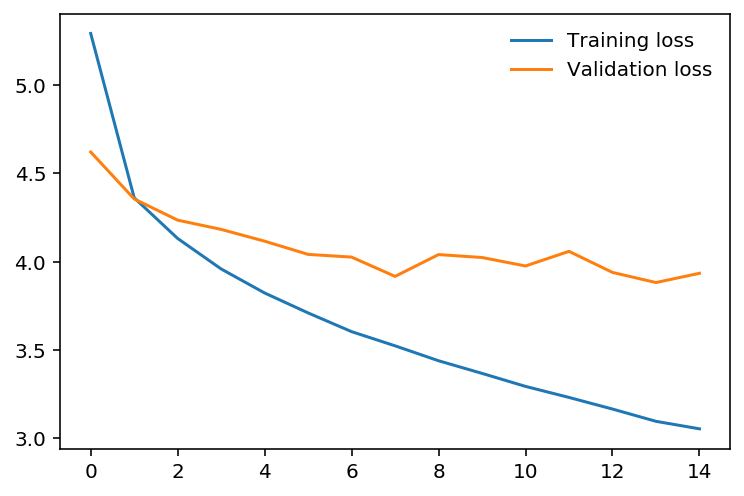

rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.0015
    lr_decay: 0
    weight_decay: 0
)
time spent:  0:20:31.572715
Minimum trainig loss:  2.928086280822754
Minimum validation loss:  3.859316110610962


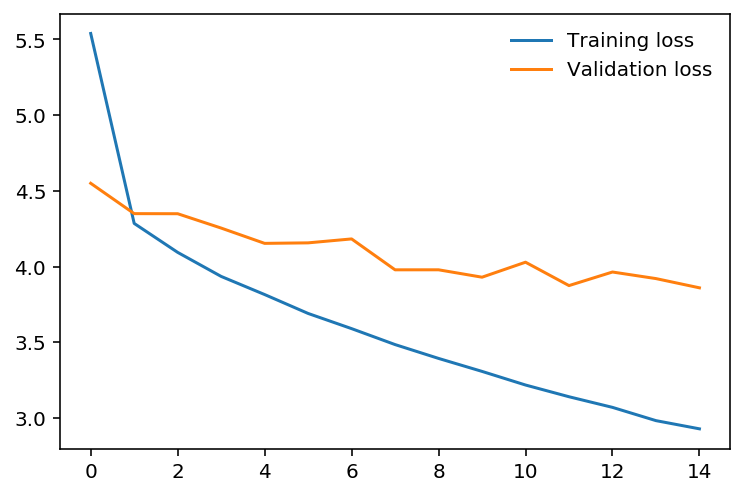

rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.002
    lr_decay: 0
    weight_decay: 0
)
time spent:  0:20:35.921299
Minimum trainig loss:  2.910022020339966
Minimum validation loss:  3.801424980163574


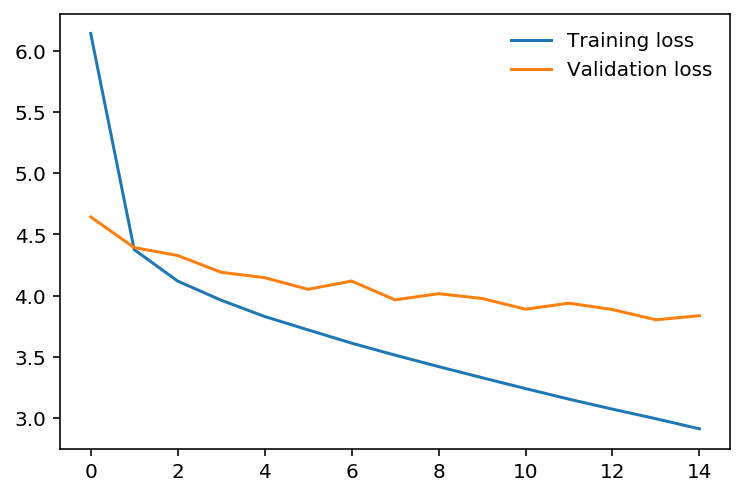

rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.0025
    lr_decay: 0
    weight_decay: 0
)
time spent:  0:20:28.935935
Minimum trainig loss:  2.9849965572357178
Minimum validation loss:  3.792888641357422


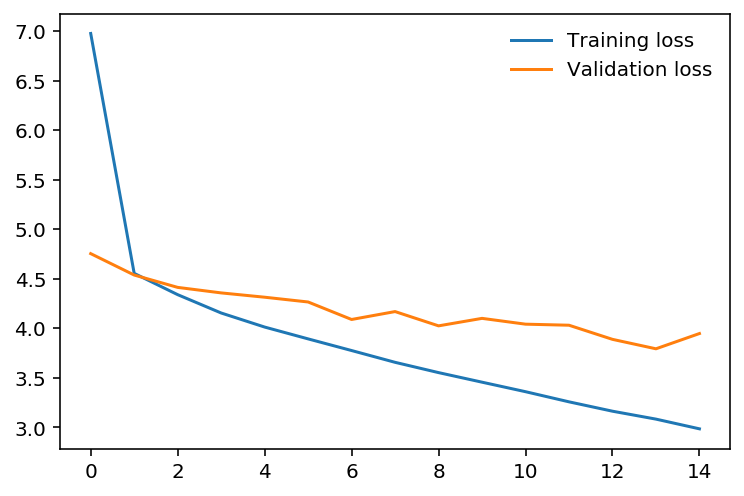

rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.003
    lr_decay: 0
    weight_decay: 0
)
time spent:  0:20:26.393150
Minimum trainig loss:  2.862687587738037
Minimum validation loss:  3.8212223052978516


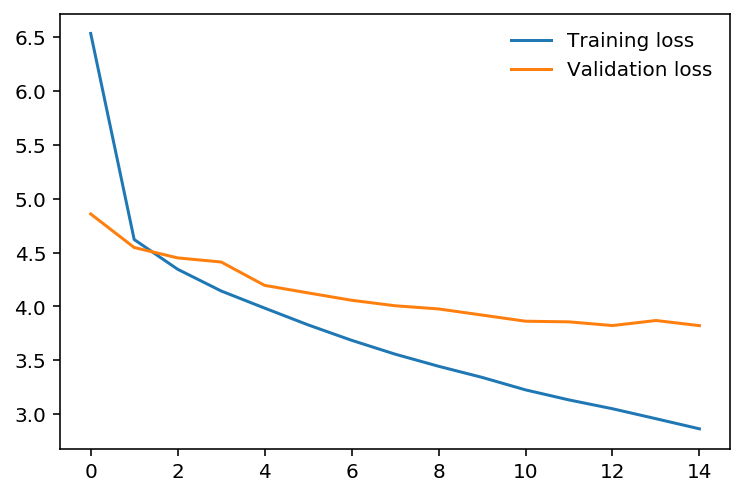

rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.0035
    lr_decay: 0
    weight_decay: 0
)
time spent:  0:20:36.741646
Minimum trainig loss:  2.754436492919922
Minimum validation loss:  3.9619977474212646


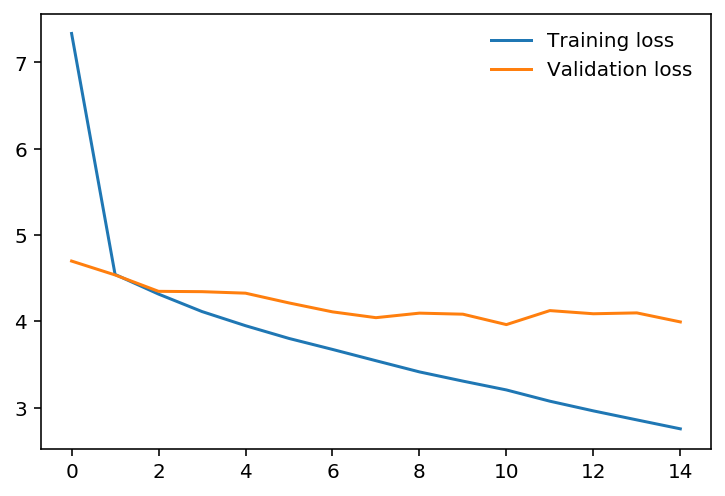

In [13]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import datetime

learning_rates = [
                 #0.1,
                 #0.01,
                 0.001,
                 0.0015,
                 0.002,
                 0.0025,
                 0.003,
                 0.0035
                 #0.003
                 #0.005,
                 #0.009,
                 #0.0009,
                 #0.0005
                 #1e-05
                 ]


optimizers = [
                optim.Adam, 
                optim.SGD, 
                optim.Adagrad
            ]


def weights_init_uniform(m):
    classname = m.__class__.__name__
    if classname.find('Linear') != -1:
        # apply a uniform distribution to the weights and a bias=0
        m.weight.data.uniform_(0.0, 1.0)
        m.bias.data.fill_(0)

def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

def reboot(loaders, model, criterion):
    del loaders
    del model
    del criterion
    torch.cuda.empty_cache()
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    
    new_model = Net()
    new_model.apply(weights_init)
    new_model.cuda()
    
    new_criterion = criterion_scratch = nn.CrossEntropyLoss()
    
    return {'train' : trainloader, 'valid' : validloader, 'test' : testloader}, new_model, new_criterion

current_optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)
for optimizer in optimizers:
    for lr in learning_rates:
        print('rebooting')
        loaders_scratch, model_scratch, criterion_scratch = reboot(loaders_scratch, model_scratch, criterion_scratch)
        del current_optimizer
        current_optimizer = optimizer(model_scratch.parameters(), lr)
        print('rebooted')
        
        print(current_optimizer)
        model, train_losses, valid_losses, time_spent = train(15, loaders_scratch, model_scratch, current_optimizer, criterion_scratch, use_cuda, 'model_scratch.pt')
        
        print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
        min_train_loss = float(min(train_losses))
        min_valid_loss = float(min(valid_losses))
        
        print("Minimum trainig loss: ", min_train_loss)
        print("Minimum validation loss: ", min_valid_loss)

        plt.plot(train_losses, label='Training loss')
        plt.plot(valid_losses, label='Validation loss')
        
        plt.legend(frameon=False)
        plt.show()


# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

rebooting
rebooted
Adam (
Parameter Group 0
    amsgrad: False
    betas: (0.9, 0.999)
    eps: 1e-08
    lr: 0.0015
    weight_decay: 0
)
time spent:  1:08:38.100177
Minimum trainig loss:  0.40478843450546265
Minimum validation loss:  3.76615047454834


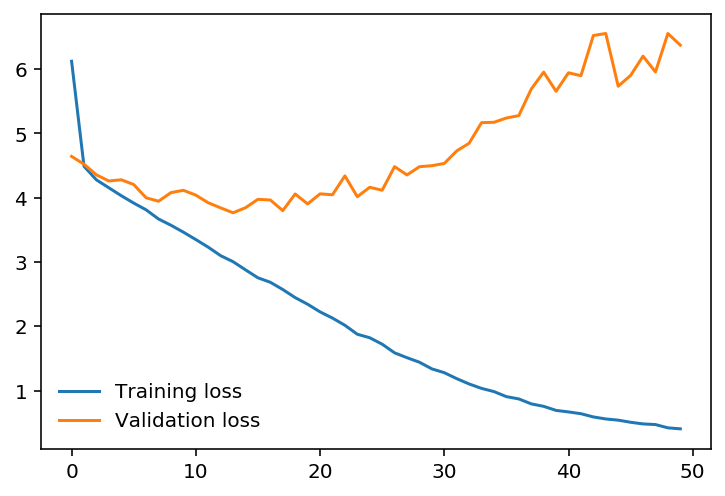

In [10]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import datetime

learning_rates = [

                 0.0015

                 ]


optimizers = [
                optim.Adam
            ]


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

def reboot(loaders, model, criterion):
    del loaders
    del model
    del criterion
    torch.cuda.empty_cache()
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    
    new_model = Net()
    new_model.apply(weights_init)
    new_model.cuda()
    
    new_criterion = criterion_scratch = nn.CrossEntropyLoss()
    
    return {'train' : trainloader, 'valid' : validloader, 'test' : testloader}, new_model, new_criterion

current_optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)
for optimizer in optimizers:
    for lr in learning_rates:
        print('rebooting')
        loaders_scratch, model_scratch, criterion_scratch = reboot(loaders_scratch, model_scratch, criterion_scratch)
        del current_optimizer
        current_optimizer = optimizer(model_scratch.parameters(), lr)
        print('rebooted')
        
        print(current_optimizer)
        model, train_losses, valid_losses, time_spent = train(50, loaders_scratch, model_scratch, current_optimizer, criterion_scratch, use_cuda, 'model_scratch.pt')
        
        print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
        min_train_loss = float(min(train_losses))
        min_valid_loss = float(min(valid_losses))
        
        print("Minimum trainig loss: ", min_train_loss)
        print("Minimum validation loss: ", min_valid_loss)

        plt.plot(train_losses, label='Training loss')
        plt.plot(valid_losses, label='Validation loss')
        
        plt.legend(frameon=False)
        plt.show()


# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.0025
    lr_decay: 0
    weight_decay: 0
)
time spent:  1:06:31.834897
Minimum trainig loss:  0.931219220161438
Minimum validation loss:  3.705179214477539


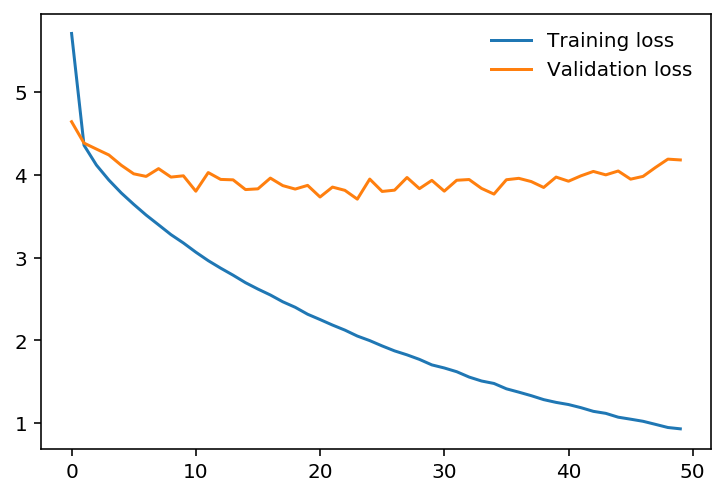

In [12]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import datetime

learning_rates = [

                 0.0025

                 ]


optimizers = [
                optim.Adagrad
            ]


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

def reboot(loaders, model, criterion):
    del loaders
    del model
    del criterion
    torch.cuda.empty_cache()
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    
    new_model = Net()
    new_model.apply(weights_init)
    new_model.cuda()
    
    new_criterion = criterion_scratch = nn.CrossEntropyLoss()
    
    return {'train' : trainloader, 'valid' : validloader, 'test' : testloader}, new_model, new_criterion

current_optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)
for optimizer in optimizers:
    for lr in learning_rates:
        print('rebooting')
        loaders_scratch, model_scratch, criterion_scratch = reboot(loaders_scratch, model_scratch, criterion_scratch)
        del current_optimizer
        current_optimizer = optimizer(model_scratch.parameters(), lr)
        print('rebooted')
        
        print(current_optimizer)
        model, train_losses, valid_losses, time_spent = train(50, loaders_scratch, model_scratch, current_optimizer, criterion_scratch, use_cuda, 'model_scratch.pt')
        
        print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
        min_train_loss = float(min(train_losses))
        min_valid_loss = float(min(valid_losses))
        
        print("Minimum trainig loss: ", min_train_loss)
        print("Minimum validation loss: ", min_valid_loss)

        plt.plot(train_losses, label='Training loss')
        plt.plot(valid_losses, label='Validation loss')
        
        plt.legend(frameon=False)
        plt.show()


# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.0025
    lr_decay: 0
    weight_decay: 0
)
time spent:  1:15:39.178696
Minimum trainig loss:  1.9604536294937134
Minimum validation loss:  3.3804588317871094


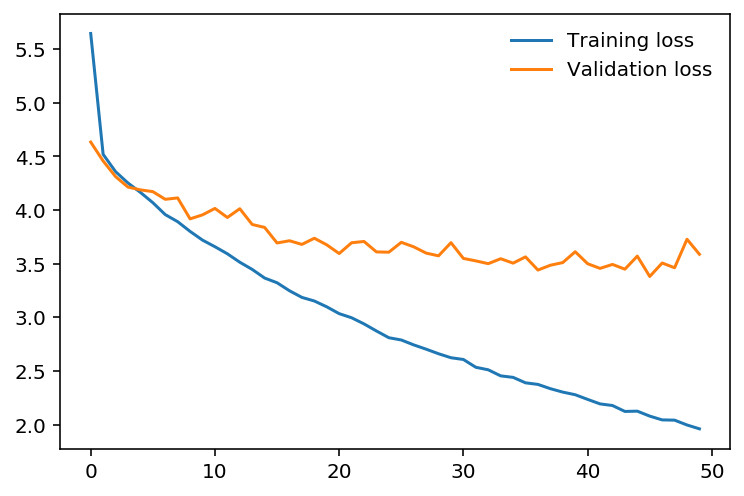

In [15]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import datetime

learning_rates = [

                 0.0025

                 ]


optimizers = [
                optim.Adagrad
            ]


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

def reboot(loaders, model, criterion):
    del loaders
    del model
    del criterion
    torch.cuda.empty_cache()
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    
    new_model = Net()
    new_model.apply(weights_init)
    new_model.cuda()
    
    new_criterion = criterion_scratch = nn.CrossEntropyLoss()
    
    return {'train' : trainloader, 'valid' : validloader, 'test' : testloader}, new_model, new_criterion

current_optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)
for optimizer in optimizers:
    for lr in learning_rates:
        print('rebooting')
        loaders_scratch, model_scratch, criterion_scratch = reboot(loaders_scratch, model_scratch, criterion_scratch)
        del current_optimizer
        current_optimizer = optimizer(model_scratch.parameters(), lr)
        print('rebooted')
        
        print(current_optimizer)
        model, train_losses, valid_losses, time_spent = train(50, loaders_scratch, model_scratch, current_optimizer, criterion_scratch, use_cuda, 'model_scratch.pt')
        
        print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
        min_train_loss = float(min(train_losses))
        min_valid_loss = float(min(valid_losses))
        
        print("Minimum trainig loss: ", min_train_loss)
        print("Minimum validation loss: ", min_valid_loss)

        plt.plot(train_losses, label='Training loss')
        plt.plot(valid_losses, label='Validation loss')
        
        plt.legend(frameon=False)
        plt.show()


# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

In [27]:
import torch.nn as nn
import torch.nn.functional as F


# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.batchn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.batchn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.batchn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.batchn4 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 14 * 14, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 133)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.2)
        

    def forward(self, x):
        x = self.pool(F.relu(self.batchn1(self.conv1(x))))
        x = self.pool(F.relu(self.batchn2(self.conv2(x))))
        x = self.pool(F.relu(self.batchn3(self.conv3(x))))
        x = self.pool(F.relu(self.batchn4(self.conv4(x))))
        #print(x.size())
        x = x.view(-1, 128 * 14 * 14)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x

#-#-# You so NOT have to modify the code below this line. #-#-#

# instantiate the CNN
model_scratch = Net()
print (model_scratch)

# check if CUDA is available
use_cuda = torch.cuda.is_available()
# move tensors to GPU if CUDA is available
if use_cuda:
    model_scratch.cuda()

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=25088, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=133, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
)


rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_value: 0
    lr: 0.0025
    lr_decay: 0
    weight_decay: 0
)
Epoch: 1 	Training Loss: 5.861588 	Validation Loss: 4.595371 	Time spent: 97.147481
Epoch: 2 	Training Loss: 4.426884 	Validation Loss: 4.295826 	Time spent: 98.638489
Epoch: 3 	Training Loss: 4.234346 	Validation Loss: 4.199708 	Time spent: 97.740678
Epoch: 4 	Training Loss: 4.108156 	Validation Loss: 4.080384 	Time spent: 98.519073
Epoch: 5 	Training Loss: 3.996714 	Validation Loss: 4.082271 	Time spent: 97.885716
Epoch: 6 	Training Loss: 3.899648 	Validation Loss: 3.977288 	Time spent: 103.871706
Epoch: 7 	Training Loss: 3.808240 	Validation Loss: 3.928509 	Time spent: 103.449129
Epoch: 8 	Training Loss: 3.742838 	Validation Loss: 3.877794 	Time spent: 107.880656
Epoch: 9 	Training Loss: 3.654892 	Validation Loss: 3.837799 	Time spent: 98.648717
Epoch: 10 	Training Loss: 3.585755 	Validation Loss: 3.810800 	Time spent: 101.081487
Epoch: 11 	Training Lo

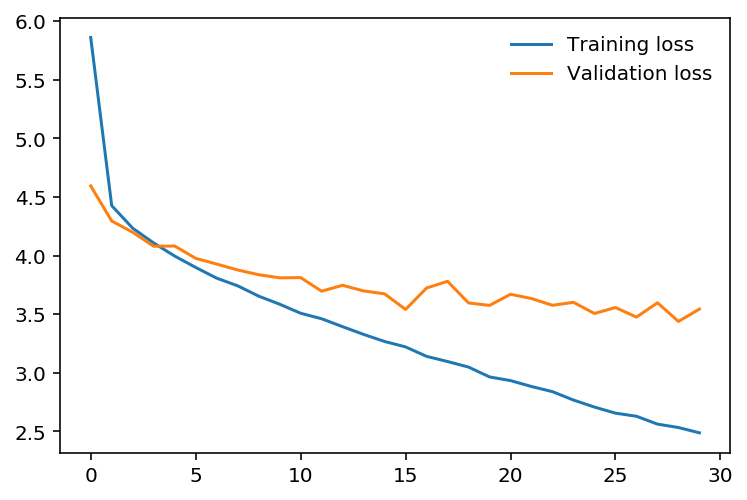

In [28]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import matplotlib.pyplot as plt
import datetime

learning_rates = [

                 0.0025

                 ]


optimizers = [
                optim.Adagrad
            ]


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

def reboot(loaders, model, criterion):
    del loaders
    del model
    del criterion
    torch.cuda.empty_cache()
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    
    new_model = Net()
    new_model.apply(weights_init)
    new_model.cuda()
    
    new_criterion = criterion_scratch = nn.CrossEntropyLoss()
    
    return {'train' : trainloader, 'valid' : validloader, 'test' : testloader}, new_model, new_criterion

current_optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)
for optimizer in optimizers:
    for lr in learning_rates:
        print('rebooting')
        loaders_scratch, model_scratch, criterion_scratch = reboot(loaders_scratch, model_scratch, criterion_scratch)
        del current_optimizer
        current_optimizer = optimizer(model_scratch.parameters(), lr)
        print('rebooted')
        
        print(current_optimizer)
        model, train_losses, valid_losses, time_spent = train(30, loaders_scratch, 
                                                              model_scratch, 
                                                              current_optimizer, 
                                                              criterion_scratch, 
                                                              use_cuda, 
                                                              'model_scratch.pt',
                                                               verbose=True)
        
        print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
        min_train_loss = float(min(train_losses))
        min_valid_loss = float(min(valid_losses))
        
        print("Minimum trainig loss: ", min_train_loss)
        print("Minimum validation loss: ", min_valid_loss)

        plt.plot(train_losses, label='Training loss')
        plt.plot(valid_losses, label='Validation loss')
        
        plt.legend(frameon=False)
        plt.show()


# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=25088, out_features=500, bias=True)
  (fc2): Linear(in_features=500, out_features=133, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.3)
)
rebooting
rebooted
Adagrad (
Parameter Group 0
    initial_accumulator_va

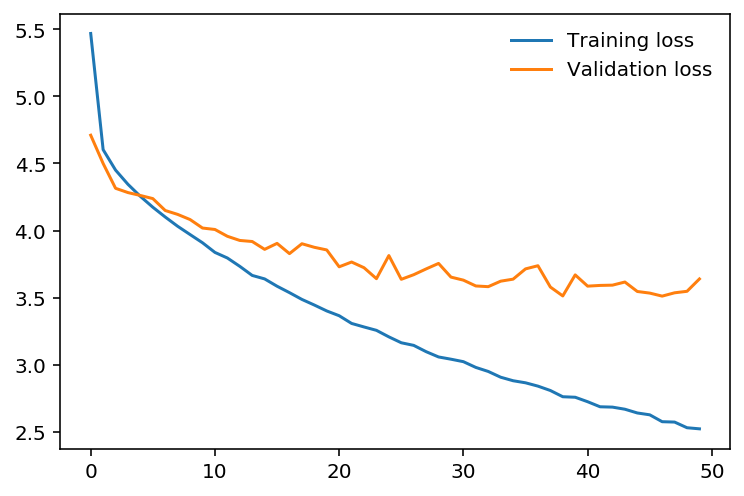

In [32]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import torch.nn as nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import datetime

# define the CNN architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.batchn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.batchn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.batchn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.batchn4 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 14 * 14, 500)
        self.fc2 = nn.Linear(500, 133)
       
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.3)
        

    def forward(self, x):
        x = self.pool(F.relu(self.batchn1(self.conv1(x))))
        x = self.pool(F.relu(self.batchn2(self.conv2(x))))
        x = self.pool(F.relu(self.batchn3(self.conv3(x))))
        x = self.pool(F.relu(self.batchn4(self.conv4(x))))
        #print(x.size())
        x = x.view(-1, 128 * 14 * 14)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.fc2(x)
        return x

model_scratch = Net()
print (model_scratch)

use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()


learning_rates = [

                 0.003

                 ]


optimizers = [
                optim.Adagrad
            ]


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

def reboot(loaders, model, criterion):
    del loaders
    del model
    del criterion
    torch.cuda.empty_cache()
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    
    new_model = Net()
    new_model.apply(weights_init)
    new_model.cuda()
    
    new_criterion = criterion_scratch = nn.CrossEntropyLoss()
    
    return {'train' : trainloader, 'valid' : validloader, 'test' : testloader}, new_model, new_criterion

current_optimizer = optim.Adam(model_scratch.parameters(), lr=0.001)
for optimizer in optimizers:
    for lr in learning_rates:
        print('rebooting')
        loaders_scratch, model_scratch, criterion_scratch = reboot(loaders_scratch, model_scratch, criterion_scratch)
        del current_optimizer
        current_optimizer = optimizer(model_scratch.parameters(), lr)
        print('rebooted')
        
        print(current_optimizer)
        model, train_losses, valid_losses, time_spent = train(50, loaders_scratch, 
                                                              model_scratch, 
                                                              current_optimizer, 
                                                              criterion_scratch, 
                                                              use_cuda, 
                                                              'model_scratch.pt',
                                                               verbose=True)
        
        print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
        min_train_loss = float(min(train_losses))
        min_valid_loss = float(min(valid_losses))
        
        print("Minimum trainig loss: ", min_train_loss)
        print("Minimum validation loss: ", min_valid_loss)

        plt.plot(train_losses, label='Training loss')
        plt.plot(valid_losses, label='Validation loss')
        
        plt.legend(frameon=False)
        plt.show()


# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))

Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=25088, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=133, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.2)
)
rebooti

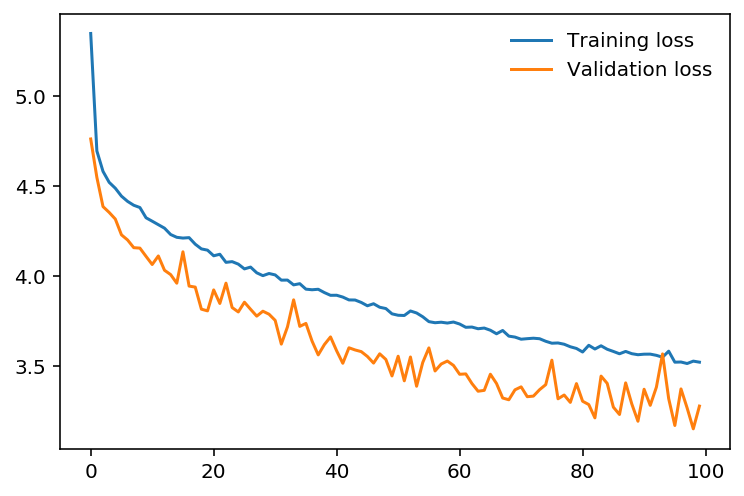

In [18]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import torch.optim as optim
from PIL import ImageFile
import matplotlib.pyplot as plt
import datetime
import torch.nn as nn
import torch.nn.functional as F
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_transforms = transforms.Compose([
                    transforms.Resize(256),
                    transforms.ColorJitter(brightness=0.2, contrast=0.2, saturation=0.2, hue=0.1),
                    transforms.RandomHorizontalFlip(),
                    transforms.RandomResizedCrop(224, scale=(0.08,1), ratio=(1,1)), 
                    transforms.ToTensor(),
                    transforms.Normalize([0.485, 0.456, 0.406],
                                         [0.229, 0.224, 0.225])])

valid_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


train_data = datasets.ImageFolder('dog_images/train', transform=train_transforms)
valid_data = datasets.ImageFolder('dog_images/valid', transform=valid_transforms)
test_data = datasets.ImageFolder('dog_images/test', transform=valid_transforms)

trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
loaders_scratch = {'train' : trainloader, 'valid' : validloader, 'test' : testloader}


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.batchn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.batchn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.batchn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.batchn4 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 14 * 14, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 133)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.2)

    def forward(self, x):
        x = self.pool(F.relu(self.batchn1(self.conv1(x))))
        x = self.pool(F.relu(self.batchn2(self.conv2(x))))
        x = self.pool(F.relu(self.batchn3(self.conv3(x))))
        x = self.pool(F.relu(self.batchn4(self.conv4(x))))
        #print(x.size())
        x = x.view(-1, 128 * 14 * 14)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


model_scratch = Net()
print (model_scratch)

use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()

learning_rates = [

                 0.0025

                 ]

optimizers = [
                optim.Adagrad
            ]


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

def reboot(loaders, model, criterion):
    del loaders
    del model
    del criterion
    torch.cuda.empty_cache()
    
    trainloader = torch.utils.data.DataLoader(train_data, batch_size=64, shuffle=True, num_workers=0)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    
    new_model = Net()
    new_model.apply(weights_init)
    new_model.cuda()
    
    new_criterion = criterion_scratch = nn.CrossEntropyLoss()
    
    return {'train' : trainloader, 'valid' : validloader, 'test' : testloader}, new_model, new_criterion

current_optimizer = ''
model_scratch = ''
criterion_scratch = ''
for optimizer in optimizers:
    for lr in learning_rates:
        print('rebooting')
        loaders_scratch, model_scratch, criterion_scratch = reboot(loaders_scratch, model_scratch, criterion_scratch)
        del current_optimizer
        current_optimizer = optimizer(model_scratch.parameters(), lr)
        print('rebooted')
        
        print(current_optimizer)
        model, train_losses, valid_losses, time_spent = train(100, loaders_scratch, 
                                                              model_scratch, 
                                                              current_optimizer, 
                                                              criterion_scratch, 
                                                              use_cuda, 
                                                              'model_scratch.pt',
                                                              verbose=True)
        
        print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
        min_train_loss = float(min(train_losses))
        min_valid_loss = float(min(valid_losses))
        
        print("Minimum trainig loss: ", min_train_loss)
        print("Minimum validation loss: ", min_valid_loss)

        plt.plot(train_losses, label='Training loss')
        plt.plot(valid_losses, label='Validation loss')
        
        plt.legend(frameon=False)
        plt.show()


# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))


In [ ]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'
import os
import torch
from torchvision import datasets
import torchvision.transforms as transforms
import torch.optim as optim
from PIL import ImageFile
import matplotlib.pyplot as plt
import datetime
import torch.nn as nn
import torch.nn.functional as F
ImageFile.LOAD_TRUNCATED_IMAGES = True

train_basic_transforms = transforms.Compose([
                                       transforms.Resize(size=258),
                                       transforms.CenterCrop(224),
                                       transforms.ToTensor(),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                      ])

train_variation_transforms = transforms.Compose([
                                       transforms.Resize(size=258),
                                       transforms.CenterCrop(224),
                                       transforms.RandomHorizontalFlip(),
                                       transforms.ColorJitter(brightness=0.4, contrast=0.4, saturation=0.4, hue=0.1),
                                       transforms.RandomRotation(50),
                                       #transforms.FiveCrop(224),
                                       transforms.ToTensor(),
                                       #transforms.Lambda(lambda crops: torch.stack([ToTensor()(crop) for crop in crops])),
                                       transforms.Normalize([0.485, 0.456, 0.406],[0.229, 0.224, 0.225])
                                      ])

valid_transforms = transforms.Compose([transforms.Resize(size=258),
                                           transforms.CenterCrop(224),
                                           transforms.ToTensor(),
                                           transforms.Normalize([0.485, 0.456, 0.406],
                                                            [0.229, 0.224, 0.225])])


train_data = datasets.ImageFolder('dog_images/train', transform=train_basic_transforms)
transformed_train_data = datasets.ImageFolder('dog_images/train', transform=train_variation_transforms)
valid_data = datasets.ImageFolder('dog_images/valid', transform=valid_transforms)
test_data = datasets.ImageFolder('dog_images/test', transform=valid_transforms)

augmented_train_data = torch.utils.data.ConcatDataset([train_data,transformed_train_data])
trainloader = torch.utils.data.DataLoader(augmented_train_data, batch_size=64, shuffle=True, num_workers=0)
validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
loaders_scratch = {'train' : trainloader, 'valid' : validloader, 'test' : testloader}


class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 16, 3, stride=1, padding=1)
        self.batchn1 = nn.BatchNorm2d(16)
        self.conv2 = nn.Conv2d(16, 32, 3, stride=1, padding=1)
        self.batchn2 = nn.BatchNorm2d(32)
        self.conv3 = nn.Conv2d(32, 64, 3, stride=1, padding=1)
        self.batchn3 = nn.BatchNorm2d(64)
        self.conv4 = nn.Conv2d(64, 128, 3, stride=1, padding=1)
        self.batchn4 = nn.BatchNorm2d(128)
        self.fc1 = nn.Linear(128 * 14 * 14, 2048)
        self.fc2 = nn.Linear(2048, 1024)
        self.fc3 = nn.Linear(1024, 133)
        self.pool = nn.MaxPool2d(2, 2)
        self.dropout = nn.Dropout(p=0.4)

    def forward(self, x):
        x = self.pool(F.relu(self.batchn1(self.conv1(x))))
        x = self.pool(F.relu(self.batchn2(self.conv2(x))))
        x = self.pool(F.relu(self.batchn3(self.conv3(x))))
        x = self.pool(F.relu(self.batchn4(self.conv4(x))))
        #Sprint(x.size())
        x = x.view(-1, 128 * 14 * 14)
        x = self.dropout(F.relu(self.fc1(x)))
        x = self.dropout(F.relu(self.fc2(x)))
        x = self.fc3(x)
        return x


model_scratch = Net()
print (model_scratch)

use_cuda = torch.cuda.is_available()
if use_cuda:
    model_scratch.cuda()

learning_rates = [

                 0.0015,
                 0.003

                 ]

optimizers = [
                optim.Adagrad,
                optim.Adam
            ]


def weights_init(m):
    if isinstance(m, nn.Conv2d):
        torch.nn.init.xavier_uniform_(m.weight)
        if m.bias is not None:
            torch.nn.init.zeros_(m.bias)

def reboot(loaders, model, criterion):
    del loaders
    del model
    del criterion
    torch.cuda.empty_cache()
    
    trainloader = torch.utils.data.DataLoader(augmented_train_data, batch_size=64, shuffle=True, num_workers=0)
    validloader = torch.utils.data.DataLoader(valid_data, batch_size=64, shuffle=True, num_workers=0)
    testloader = torch.utils.data.DataLoader(test_data, batch_size=32, shuffle=False, num_workers=0)
    
    new_model = Net()
    new_model.apply(weights_init)
    new_model.cuda()
    
    new_criterion = criterion_scratch = nn.CrossEntropyLoss()
    
    return {'train' : trainloader, 'valid' : validloader, 'test' : testloader}, new_model, new_criterion

current_optimizer = ''
model_scratch = ''
criterion_scratch = ''
for optimizer in optimizers:
    for lr in learning_rates:
        print('rebooting')
        loaders_scratch, model_scratch, criterion_scratch = reboot(loaders_scratch, model_scratch, criterion_scratch)
        del current_optimizer
        current_optimizer = optimizer(model_scratch.parameters(), lr)
        print('rebooted')
        
        print(current_optimizer)
        model, train_losses, valid_losses, time_spent = train(50, loaders_scratch, 
                                                              model_scratch, 
                                                              current_optimizer, 
                                                              criterion_scratch, 
                                                              use_cuda, 
                                                              'model_scratch.pt',
                                                              verbose=True)
        
        print("time spent: ", str(datetime.timedelta(seconds=time_spent)))
        
        min_train_loss = float(min(train_losses))
        min_valid_loss = float(min(valid_losses))
        
        print("Minimum trainig loss: ", min_train_loss)
        print("Minimum validation loss: ", min_valid_loss)

        plt.plot(train_losses, label='Training loss')
        plt.plot(valid_losses, label='Validation loss')
        
        plt.legend(frameon=False)
        plt.show()


# load the model that got the best validation accuracy
#model_scratch.load_state_dict(torch.load('model_scratch.pt'))


Net(
  (conv1): Conv2d(3, 16, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv2): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn2): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn3): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv4): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (batchn4): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=25088, out_features=2048, bias=True)
  (fc2): Linear(in_features=2048, out_features=1024, bias=True)
  (fc3): Linear(in_features=1024, out_features=133, bias=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (dropout): Dropout(p=0.4)
)
rebooti

### (IMPLEMENTATION) Test the Model

Try out your model on the test dataset of dog images.  Use the code cell below to calculate and print the test loss and accuracy.  Ensure that your test accuracy is greater than 10%.

In [15]:
def test(loaders, model, criterion, use_cuda):

    # monitor test loss and accuracy
    test_loss = 0.
    correct = 0.
    total = 0.

    model.eval()
    for batch_idx, (data, target) in enumerate(loaders['test']):
        # move to GPU
        if use_cuda:
            data, target = data.cuda(), target.cuda()
        # forward pass: compute predicted outputs by passing inputs to the model
        output = model(data)
        # calculate the loss
        loss = criterion(output, target)
        # update average test loss ''
        test_loss = test_loss + ((1 / (batch_idx + 1)) * (loss.data - test_loss))
        # convert output probabilities to predicted class
        pred = output.data.max(1, keepdim=True)[1]
        # compare predictions to true label
        correct += np.sum(np.squeeze(pred.eq(target.data.view_as(pred))).cpu().numpy())
        total += data.size(0)
            
    print('Test Loss: {:.6f}\n'.format(test_loss))

    print('\nTest Accuracy: %2d%% (%2d/%2d)' % (
        100. * correct / total, correct, total))

# call test function    
model_scratch.load_state_dict(torch.load('model_scratch.pt'))
test(loaders_scratch, model_scratch, criterion_scratch, use_cuda)

Test Loss: 3.570211


Test Accuracy: 15% (133/836)
